### Importez votre ensemble de données et effectuez une analyse et une visualisation initiales

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
bank = pd.read_csv("bank.csv")

In [29]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [30]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [31]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [32]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


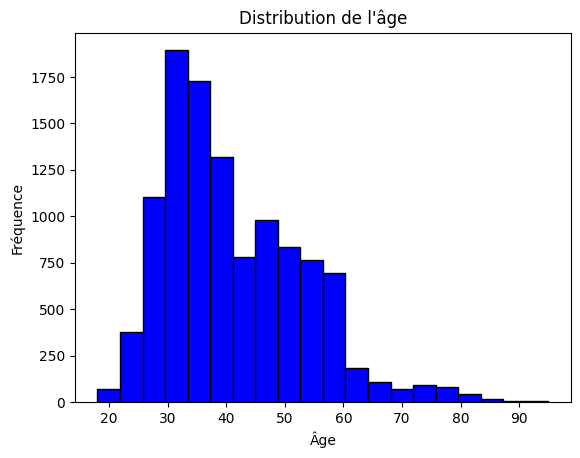

In [33]:
# Visualiser l'âge avec un histogramme

plt.hist(bank['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

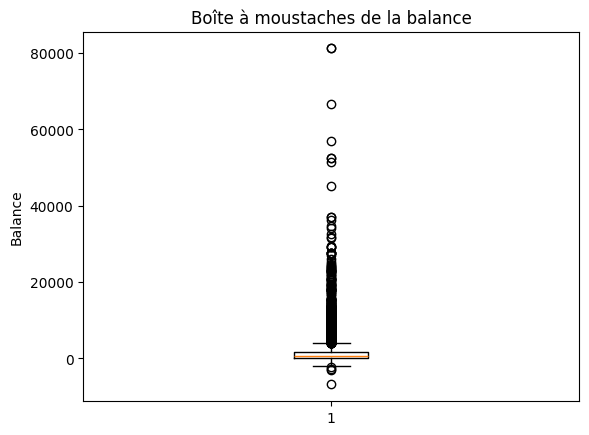

In [34]:
# Boîte à moustaches pour la balance
plt.boxplot(bank['balance'])
plt.title('Boîte à moustaches de la balance')
plt.ylabel('Balance')
plt.show()

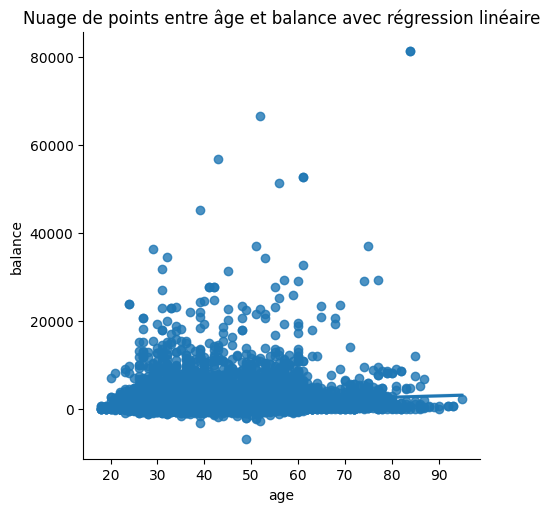

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# Nuage de points entre âge et balance avec régression linéaire
sns.lmplot(x='age', y='balance', data=bank)
plt.title('Nuage de points entre âge et balance avec régression linéaire')
plt.show()


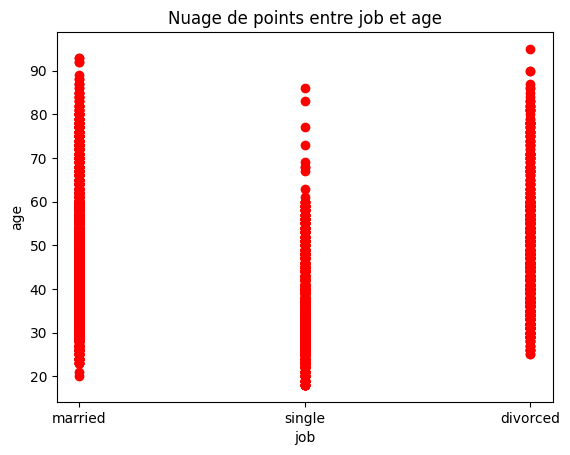

In [36]:
# Tracer un nuage de points pour deux colonnes spécifiques
plt.scatter(bank['marital'], bank['age'], color='red', marker='o')
plt.title('Nuage de points entre job et age')
plt.xlabel('job')
plt.ylabel('age')
plt.show()

C:\Users\Murielle\AppData\Local\Temp\ipykernel_7328\3151071043.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bank['duration'], shade=True, color='green')


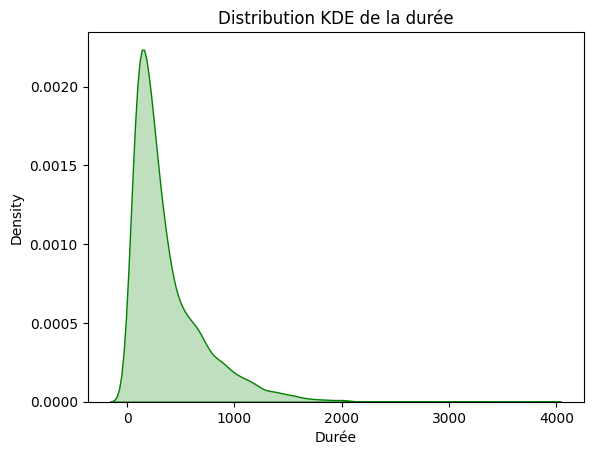

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution KDE de la durée
sns.kdeplot(bank['duration'], shade=True, color='green')
plt.title('Distribution KDE de la durée')
plt.xlabel('Durée')
plt.show()


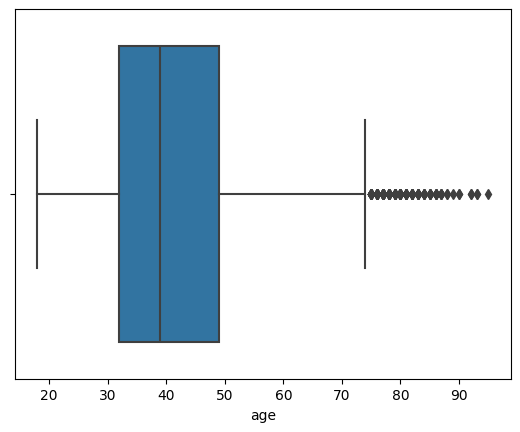

In [38]:
# Identifier les valeurs aberrantes avec un boxplot
sns.boxplot(x=bank['age'])
plt.show()

In [39]:
# Construire un réseau d'apprentissage profond pour prédire le résultat de la campagne marketing ("dépôt" Oui ou Non)

In [40]:
#pip install --upgrade tensorflow keras


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers

# Séparer les caractéristiques (features) et la cible
X = bank.drop('deposit', axis=1)
y = bank['deposit']


# Encodage one-hot des variables catégorielles
X = pd.get_dummies(X)

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
# Suite en cours